# Dimensionality Reduction

In [2]:
import pandas as pd
df = pd.read_csv("data/mnist_train.csv")

## PCA for Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


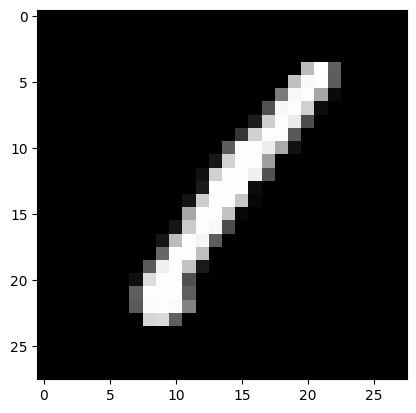

In [15]:
# Split pixels, target
pixels, target = df.drop("label", axis=1), df["label"]

# Visualize an image
import matplotlib.pyplot as plt
plt.imshow(pixels.iloc[0].values.reshape(28, 28), cmap="gray")
plt.show()

In [16]:
# We're gonna convert this 785 dimensional data to  2D data using PCA
print(target.shape)
print(pixels.shape)

(42000,)
(42000, 784)


In [17]:
pixels_subset, targets_subset = pixels[:15000], target[:15000]

In [19]:
print(pixels_subset.shape)
print(targets_subset.shape)

(15000, 784)
(15000,)


In [20]:
# Standardize data before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pixels_subset)
scaled_pixels = scaler.transform(pixels_subset)

In [22]:
scaled_pixels.shape

(15000, 784)

In [23]:
# Find the covariance matrix
# covariance matrix is matumul of input and input transpose
import numpy as np
covariance_matrix = np.matmul(scaled_pixels.T, scaled_pixels)

In [24]:
covariance_matrix.shape

(784, 784)

In [25]:
# Find eigenvalues and eigenvectors
from scipy.linalg import eigh
# Eigh values will be from 0 to 784, to get 2 vectors with max variance we use
# eigvals convention parameter below
values, vectors = eigh(covariance_matrix, eigvals=(782,783))

In [26]:
values

array([435532.55785282, 605719.29173629])

In [28]:
# Now to perform PCS, let's multiply eigen vector with stadardize data
vectors.shape, scaled_pixels.shape

((784, 2), (15000, 784))

In [29]:
# we want the data to be in two dimension, so we multiply the vectors with sample data
pca_data = np.matmul(vectors.T, scaled_pixels.T) # 2 x 784 @ 784 x 15000 = 2 x 15000

In [30]:
pca_data.shape

(2, 15000)

In [31]:
# Moving this data to pandas
new_coordinates = pd.DataFrame(pca_data.T, columns=["1st_principal", "2nd_principal"])

In [32]:
new_coordinates

,1st_principal,2nd_principal
0,-5.558661,-5.043558
1,6.193635,19.305278
2,-1.909878,-7.678775
3,5.525748,-0.464845
4,6.366527,26.644289
...,...,...
14995,3.139416,-4.758956
14996,1.946714,-1.314215
14997,-2.147937,-1.507269
14998,3.204122,-6.537313


In [33]:
new_coordinates["label"] = targets_subset

In [34]:
new_coordinates.head()

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1
1,6.193635,19.305278,0
2,-1.909878,-7.678775,1
3,5.525748,-0.464845,4
4,6.366527,26.644289,0


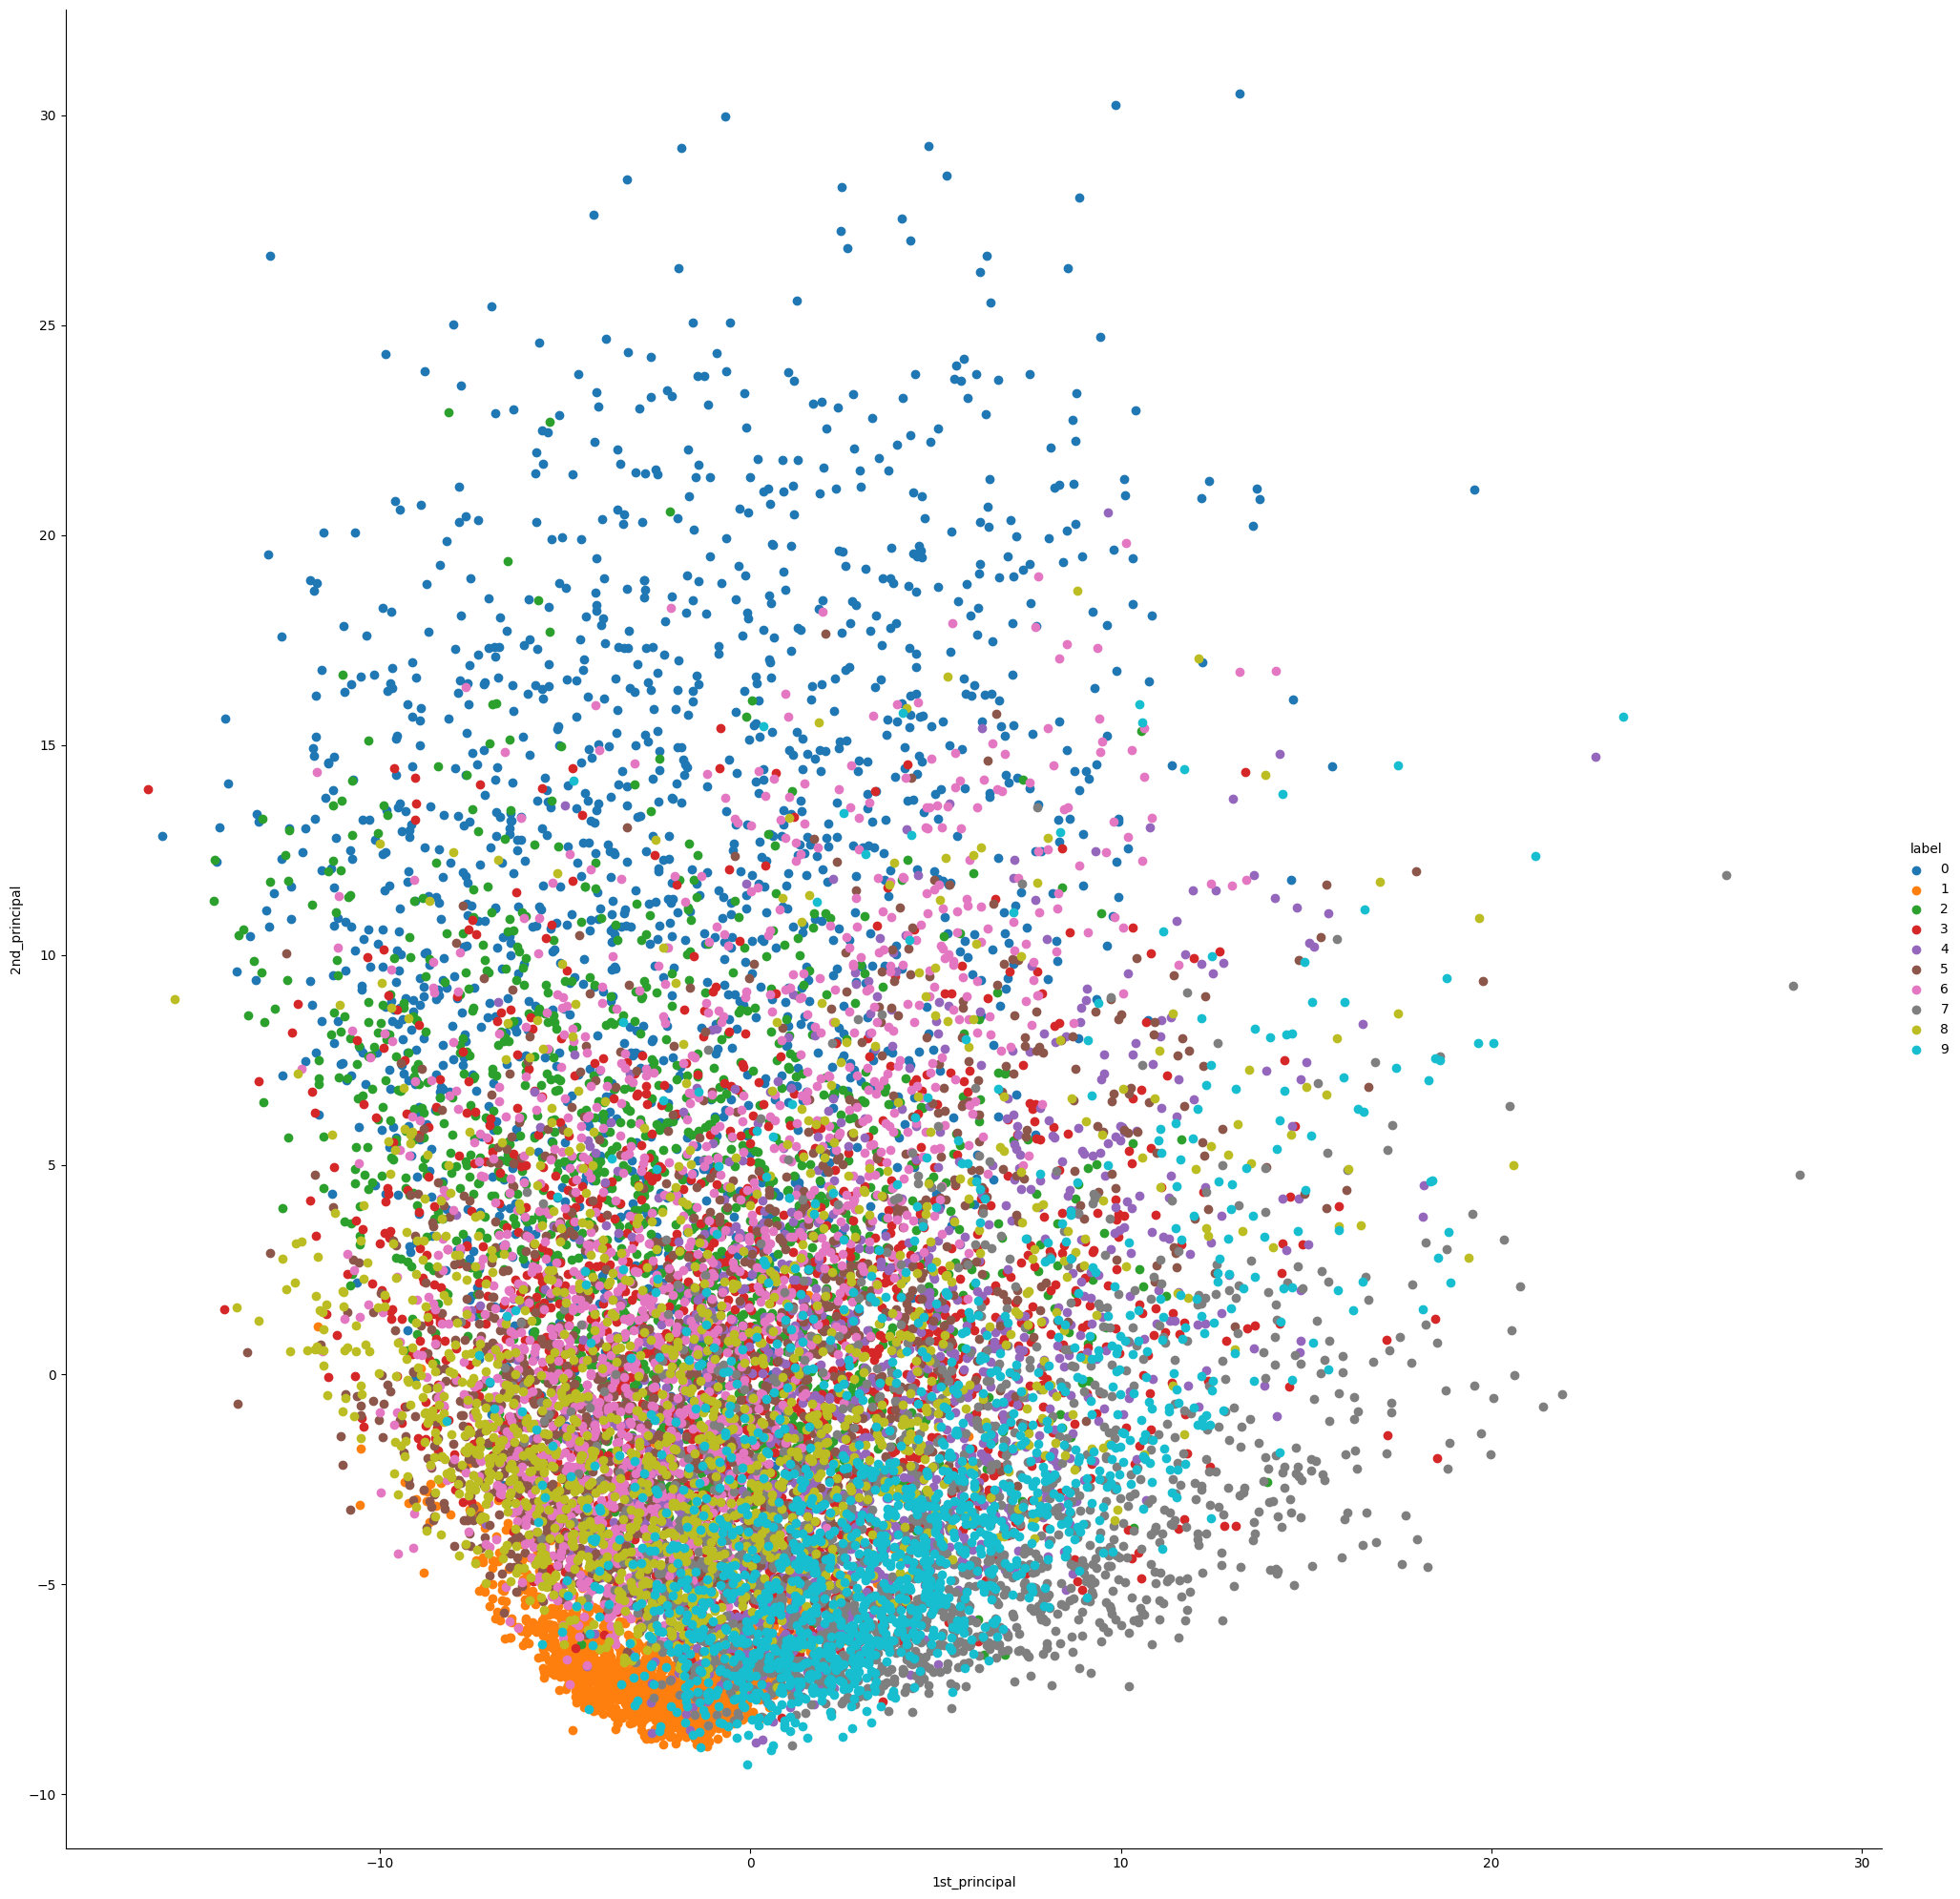

In [38]:
# visualize the pca'd data
import seaborn as sn
sn.FacetGrid(
    new_coordinates,
    hue="label",
    height=20,
).map(
    plt.scatter,
    "1st_principal",
    "2nd_principal"
).add_legend();

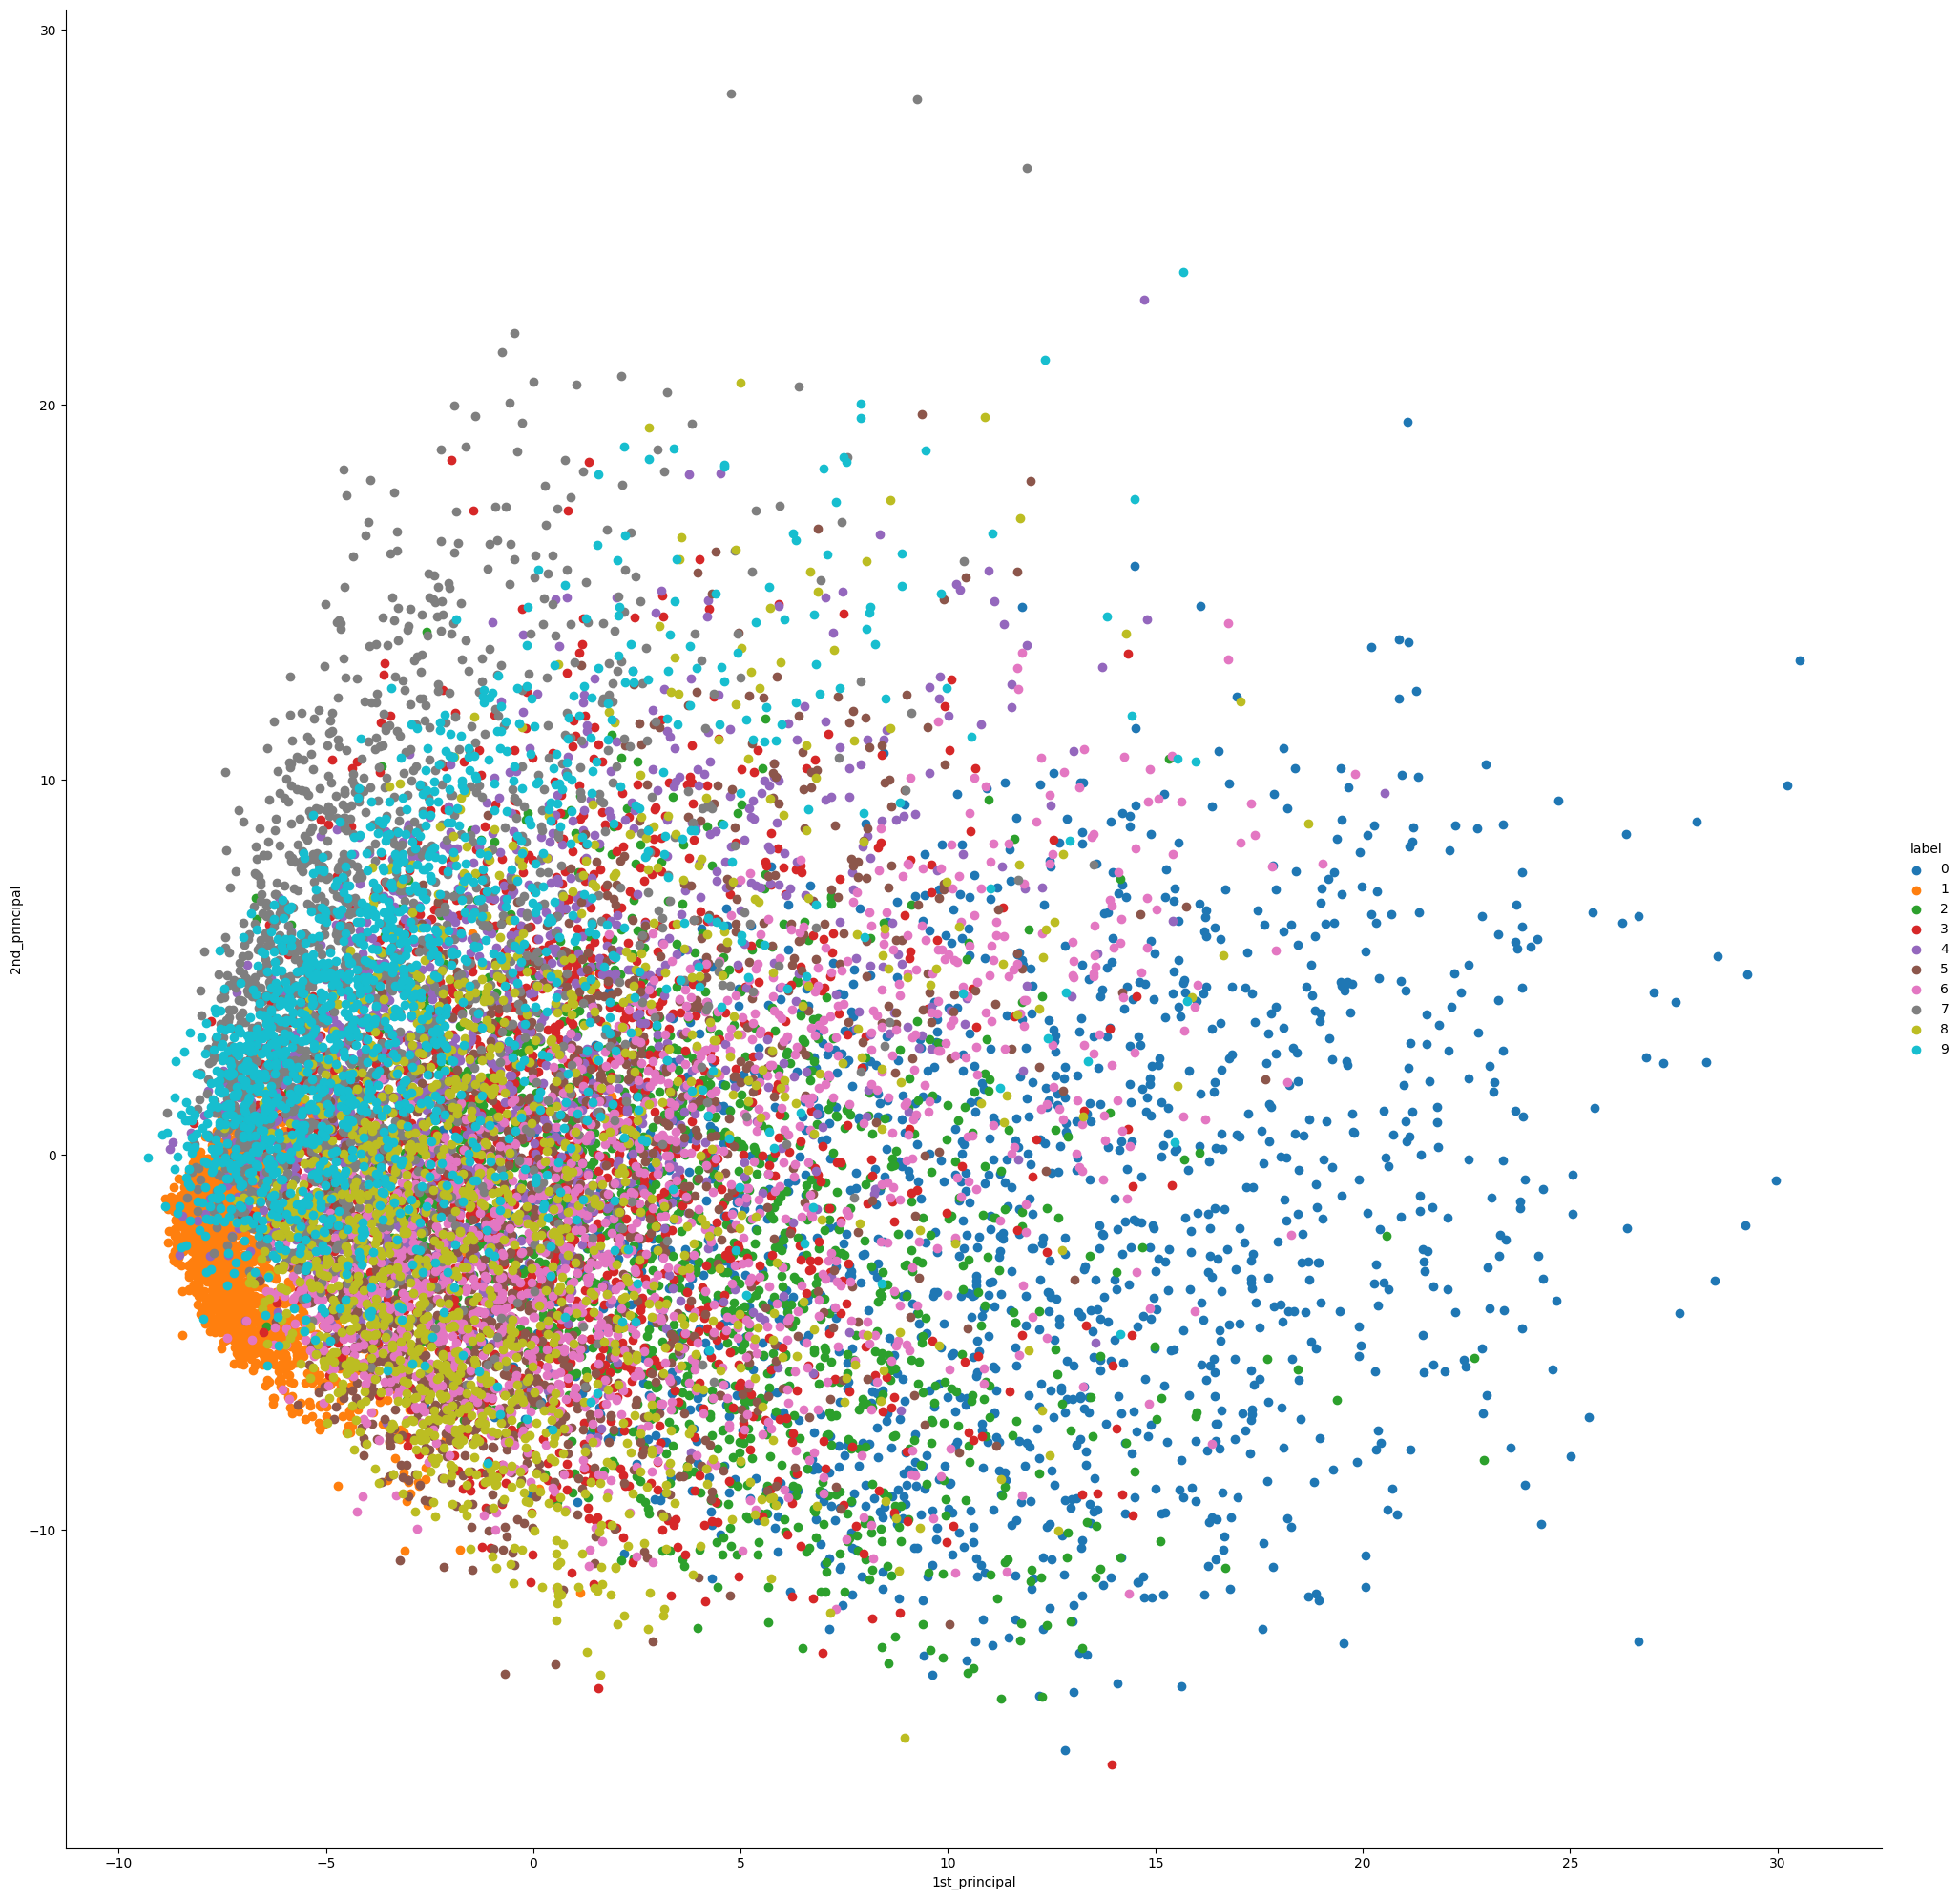

In [39]:
# we can do all these step with sklean in a single line
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_pixels)
pca_data = pca.transform(scaled_pixels)
new_coordinates = pd.DataFrame(pca_data, columns=["1st_principal", "2nd_principal"])
new_coordinates["label"] = targets_subset
sn.FacetGrid(
    new_coordinates,
    hue="label",
    height=20,
).map(
    plt.scatter,
    "1st_principal",
    "2nd_principal"
).add_legend();

## PCA for dimensionality reduction(for Modeling not viz)

In [40]:
# Convert 784 -> 10 or anything greater than 3 dimensions.
# d(784) -> d'(10)
# What's the goal of PCA? to retain maximum variance after dimensionality reduction
# Then what's the optimal d'? we can calculate this using eigen values
# lambda_1 + lambda_2 +...+lambda_d' / summation of lambda = variance covered by d'
# Let's finda a d' with variance > 90%

pca.n_components = 784 # convert 784 features to 784 principal components
pca_data = pca.fit_transform(scaled_pixels)


In [43]:
# Eigen values
len(pca.explained_variance_)

784

In [44]:
# Let's calculate how much variance is covered by each eigen value
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
len(percentage_var_explained)

784

In [45]:
# Now let's calculate cumulative sum for each value until 784
var_cumsum = np.cumsum(percentage_var_explained)

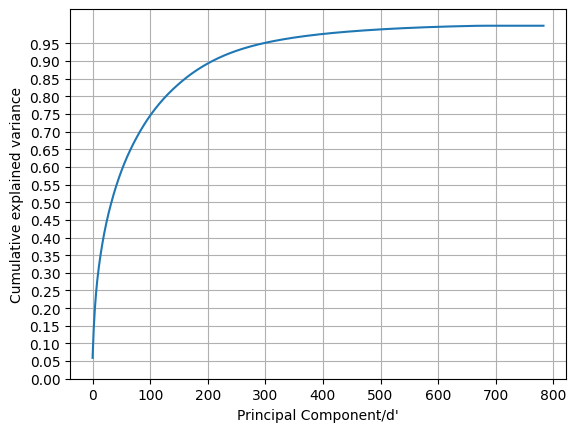

In [50]:
# Let's plot this to find the optimal d'
plt.plot(var_cumsum)
plt.grid(True)
plt.yticks(np.arange(0,1.0, 0.05))
plt.xlabel("Principal Component/d'")
plt.ylabel("Cumulative explained variance");

Based on the plot 90% variane is obtained at d' 200.

In [51]:
pca.n_components = 200
new_data = pca.fit_transform(scaled_pixels)
new_data.shape

(15000, 200)